In [1]:
import pickle
from vgg import *
import cv2

Using Theano backend.
/Users/deepakmenghani/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
CLASSES = pickle.load(open('CLASSES.pkl'))

In [3]:
len(CLASSES)

1000

In [4]:
# Test pretrained model
model = VGG_16('vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [5]:
name = 'orange.jpg'
im = cv2.resize(cv2.imread(name), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

In [24]:
out = model.predict(im)
result = np.argmax(out)

In [25]:
sorted_index = out.argsort()[0][-5:]
print CLASSES[sorted_index[-1]]
print CLASSES[sorted_index[-2]]
print CLASSES[sorted_index[-3]]
print CLASSES[sorted_index[-4]]
print CLASSES[sorted_index[-5]]

orange
lemon
butternut squash
spaghetti squash
pill bottle


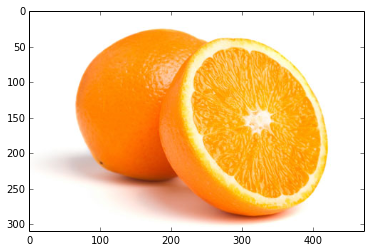

In [18]:
#print CLASSES[result]
import matplotlib.pyplot as plt
%matplotlib inline
im = cv2.imread(name)
im = cv2.cvtColor(im, cv2.cv.CV_BGR2RGB)
plt.imshow(im)